To-Do:

- fix file paths with os.join
- finish writing the class
- write the load-census function
- 

In [1]:
from Census import Census
import matplotlib.pyplot as plt
import geopandas as gpd

In [5]:
c = Census(
    gtfs_filename="../../data/mmt_gtfs/stops.csv")

Getting geodataframe for tracts from Tigerweb...


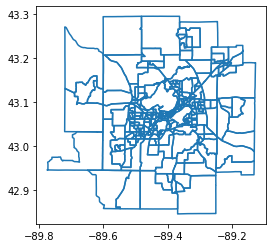

In [7]:
gdf_tracts = c.getCensusTracts()
gdf_tracts.boundary.plot()
plt.show()